# Developement of multi objective operators

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance

### Modules imports

In [223]:
%autoreload 2

from source.operators.continuous import crossover, mutation
from source.operators.multiobjective import assign_pareto_strength, is_dominated_solution, is_non_dominated_solution, collect_non_dominated_solutions, collect_dominated_solutions
from source.spea_optimizer import SPEAOptimizer

### Sample objective

In [6]:
def schaffer_objective(x):
    return [x**2, (x - 2)**2]

In [7]:
def dummy_objective(x):
    return [x, np.random.rand() * x]

In [8]:
dummy_solutions = np.array([
    [2, 3],
    [2, 8],
    [3, 9],
    [3, 5],
    [4, 5],
    [5, 2],
    [5, 3],
    [5, 6],
    [8, 1],
    [9, 3],
])

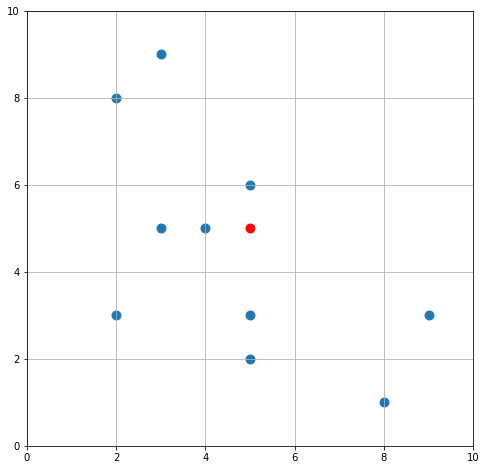

In [65]:
plt.figure(figsize=(8, 8))

plt.scatter(dummy_solutions[:, 0], dummy_solutions[:, 1], s=80)
plt.scatter(5, 5, s=80, c="r")
plt.xlim([0, 10])
plt.ylim([0, 10])

plt.grid()

In [93]:
non_dominated_solutions = []
for solution in dummy_solutions:
    non_dominated_solutions.append(np.all(np.any(_compare_in_dims(solution, dummy_solutions, np.less_equal))))

In [159]:
results = _compare_in_dims(np.array([5, 5]), dummy_solutions, np.less_equal)

In [160]:
for dummy_solution, result in zip(dummy_solutions, results):
    print(f"Solution: {dummy_solution} Result: {result}")

Solution: [2 3] Result: [False False]
Solution: [2 8] Result: [False  True]
Solution: [3 9] Result: [False  True]
Solution: [3 5] Result: [False  True]
Solution: [4 5] Result: [False  True]
Solution: [5 2] Result: [ True False]
Solution: [5 3] Result: [ True False]
Solution: [5 6] Result: [ True  True]
Solution: [8 1] Result: [ True False]
Solution: [9 3] Result: [ True False]


### Tests if the solution is dominated

In [161]:
results

array([[False, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True, False],
       [ True, False]])

In [162]:
np.any(results, axis=1)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [163]:
np.all(np.any(results, axis=1))

False

In [168]:
is_non_dominated_solution(np.array([10, 10]), dummy_solutions, mode="min")

False

### Test if solution in non dominated

In [229]:
results = _compare_in_dims(np.array([0, 0]), dummy_solutions, np.less_equal)

In [210]:
np.any(results, axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [211]:
np.all(results, axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [215]:
results = collect_non_dominated_solutions(
    single_solution=np.array([10, 10]),
    compared_solutions=dummy_solutions,
    mode="min",
)

In [230]:
results

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [221]:
results = collect_dominated_solutions(
    single_solution=np.array([0, 0]),
    compared_solutions=dummy_solutions,
    mode="min",
)

In [222]:
results

array([[2, 3],
       [2, 8],
       [3, 9],
       [3, 5],
       [4, 5],
       [5, 2],
       [5, 3],
       [5, 6],
       [8, 1],
       [9, 3]])

In [228]:
assign_pareto_strength(
    single_solution=np.array([8, 8]),
    compared_solutions=dummy_solutions,
    mode="min",
)

4

In [231]:
results = _compare_in_dims(np.array([5, 5]), np.array([[1, 1], [10, 10], [1, 10], [10, 1]]), np.less_equal)

In [232]:
results

array([[False, False],
       [ True,  True],
       [False,  True],
       [ True, False]])